## out produce

In [49]:
import math
import numpy as np
from scipy import special
import cmath
import sawcom7 as sc
import random

pI = 3600E-9 #The period of IDT, normally is one wavelength
h = 0.08*pI #The thickness of IDT, Al or Al-Cu1%
W1 = 20*pI # Width of IDT (acoustic aperture), in m
m_ratio = 0.6 #The metallization ratio
epsilon_0 = 8.8541878128e-12 #The permittivity of vacuum

npiezo_1 = 50.3562796837374
eta = (0.182+0.349*(2*h/pI))*math.sqrt(2*np.pi/pI)
e = (0.0388+0.618*(2*h/pI))*math.sqrt(2*np.pi/pI)
alpha = 0.05
c = 1 + (0.0678+1.27*(2*h/pI))**2
k2 = 0.0655 + 0.206*(2*h/pI)
vb = 4226.54

npiezo_1_num = [i for i in np.linspace(npiezo_1*0.8,npiezo_1*1.2,10000)]
eta_num = [i for i in np.linspace(eta*0.8,eta*1.2,10000)]
e_num = [i for i in np.linspace(e*0.8,e*1.2,10000)]
alpha_num = [i for i in np.linspace(alpha*0.8,alpha*1.2,10000)]
c_num = [i for i in np.linspace(c*0.01,c*2.0,10000)]
k2_num = [i for i in np.linspace(k2*0.01,k2*4.0,10000)]
vb_num = [i for i in np.linspace(vb*0.8,vb*1.2,10000)]

x = np.zeros((20000,7))
for i in range(0,20000):
    random.seed()
    npi = random.sample(npiezo_1_num,1)[0]
    et = random.sample(eta_num,1)[0]
    e = random.sample(e_num,1)[0]
    al = random.sample(alpha_num,1)[0]
    c = random.sample(c_num,1)[0]
    k = random.sample(k2_num,1)[0]
    v = random.sample(vb_num,1)[0]
    x[i,:]=[npi,et,e,al,c,k,v]
    
x_max = x.max(axis=0).reshape((1,7))
x_min = x.min(axis=0).reshape((1,7))
file = 'D:/data/7p/out/' +'MP60' + '.csv'
with open(file,'w',newline='') as f:
    np.savetxt(f,x,delimiter=',',newline='\n')
file = file + 'maxmin.csv'
with open(file, 'w', newline='') as f:
    np.savetxt(f, x_max, delimiter=',',newline='\n')
    np.savetxt(f, x_min, delimiter=',',newline='\n')


In [50]:
import math
import numpy as np
from scipy import special
import cmath
import sawcom7 as sc

pI = 3600E-9 #The period of IDT, normally is one wavelength
h = 0.08*pI #The thickness of IDT, Al or Al-Cu1%
W1 = 20*pI # Width of IDT (acoustic aperture), in m
m_ratio = 0.6 #The metallization ratio
epsilon_0 = 8.8541878128e-12 #The permittivity of vacuum

npiezo_1 = 50.3562796837374
eta = (0.182+0.349*(2*h/pI))*math.sqrt(2*np.pi/pI)
e = (0.0388+0.618*(2*h/pI))*math.sqrt(2*np.pi/pI)
alpha = 0.05
c = 1 + (0.0678+1.27*(2*h/pI))**2
k2 = 0.0655 + 0.206*(2*h/pI)
vb = 4226.54

eta_b = (eta+2*abs(e))/2
epsilon = npiezo_1*epsilon_0

x1 = np.cos(np.pi*m_ratio )
m1 = math.sqrt((1-x1)/2) 
km1 = special.ellipk(m1, out=None)
p1 = 2*km1/np.pi
x2 = -np.cos(np.pi*m_ratio )
m2 = math.sqrt((1-x2)/2) 
km2 = special.ellipk(m2, out=None)
p2 = 2*km2/np.pi
p_factor = p1/p2




freq = np.linspace(0.5E9, 1.5E9, 501)
# freq_mhz = freq/1e6

# eta = (0.182+0.349*(2*h/pI))*math.sqrt(2*np.pi/pI)
# e = (0.0388+0.618*(2*h/pI))*math.sqrt(2*np.pi/pI)
# eta_b = (eta+2*abs(e))/2
# alpha = 10**(-3.39+7.39*(2*h/pI))
# c = 1 + (0.0678+1.27*(2*h/pI))**2
# k2 = 0.0655 + 0.206*(2*h/pI)
# vb = 4226.54

delta_v = - (eta**2)/2
k = abs(e)*(eta+abs(e)/2)
kb = -(abs(e)**2)*eta/(eta+2*abs(e))
delta_b = -((eta**2)-2*((abs(e)**2)))/4
omega = freq*2*np.pi
delta = omega/vb - 2*np.pi/pI - 1j*alpha

# epsilon = npiezo_1*epsilon_0
v_delta = []
for i in range(0,len(delta)):
    v_delta_0 = eta_b/((cmath.sqrt(delta_b-delta[i]))+ eta_b)# wave velocity in m/s
    v_delta.append(v_delta_0)
v_delta = np.array(v_delta)
omega = freq*2*np.pi
C = (W1*epsilon*p_factor)/pI ##To check
xi = []
for i in range(0,len(omega)):
    xi_0 = c*cmath.sqrt((omega[i]*C*k2)/(pI*np.pi))
    xi_0 = -1j*xi_0
    xi.append(xi_0)
xi = np.array(xi)

lam1 = pI # Wavelength in m of SAW filters 
#v1 = 3925 # wave velocity in m/s
# epsilon_0 = 8.8541878128e-12 #The permittivity of vacuum
# epsilon = npiezo_1*epsilon_0 # The effective permittivity of piezoelectric layer 
c12 =  -1j*c*(k+kb*v_delta) # Reflectivity per unit length (~1.7% reflected per IDT spaced at lam/2)
a1 = -xi # The transduction coefficient
n1 = 100 # The number of IDT pairs
L1 = n1*lam1 # Length of total IDT the grating, in m
#W1 = 22*lam1 # Width of IDT (acoustic aperture), in m
#d = sc.delta(freq,v1,lam1) - 500j
Ct=n1*W1*epsilon # Static capacitance of total IDT
#d1 = sc.delta(freq,v1,lam1)
d1 = sc.thetau(c,delta,delta_v,kb,v_delta)
C1 = sc.C0(freq,Ct)
idt_ref_1 = sc.pmatrix(lam1,c12,a1,L1,d1,C1) #The P-Matrix of SAW resonator with refelection 
y11 = 20 * np.log10(abs(idt_ref_1.p33)/5)
# y = np.stack((freq,y11), axis=-1)
# return y

In [66]:
import math
import numpy as np
from scipy import special
import cmath
import sawcom7 as sc

pI = 3600E-9 #The period of IDT, normally is one wavelength
h = 0.08*pI #The thickness of IDT, Al or Al-Cu1%
W1 = 20*pI # Width of IDT (acoustic aperture), in m
m_ratio = 0.6 #The metallization ratio
epsilon_0 = 8.8541878128e-12 #The permittivity of vacuum

npiezo_1 = 50.3562796837374*1.20
eta = (0.182+0.349*(2*h/pI))*math.sqrt(2*np.pi/pI)*1.20
e = (0.0388+0.618*(2*h/pI))*math.sqrt(2*np.pi/pI)*1.20
alpha = 0.05*1.20
c = (1 + (0.0678+1.27*(2*h/pI))**2)*1.20
k2 = (0.0655 + 0.206*(2*h/pI))*1.20
vb = 4226.54*1.20

eta_b = (eta+2*abs(e))/2
epsilon = npiezo_1*epsilon_0

x1 = np.cos(np.pi*m_ratio )
m1 = math.sqrt((1-x1)/2) 
km1 = special.ellipk(m1, out=None)
p1 = 2*km1/np.pi
x2 = -np.cos(np.pi*m_ratio )
m2 = math.sqrt((1-x2)/2) 
km2 = special.ellipk(m2, out=None)
p2 = 2*km2/np.pi
p_factor = p1/p2




freq = np.linspace(0.5E9, 1.5E9, 501)
# freq_mhz = freq/1e6

# eta = (0.182+0.349*(2*h/pI))*math.sqrt(2*np.pi/pI)
# e = (0.0388+0.618*(2*h/pI))*math.sqrt(2*np.pi/pI)
# eta_b = (eta+2*abs(e))/2
# alpha = 10**(-3.39+7.39*(2*h/pI))
# c = 1 + (0.0678+1.207*(2*h/pI))**2
# k2 = 0.0655 + 0.206*(2*h/pI)
# vb = 4226.54

delta_v = - (eta**2)/2
k = abs(e)*(eta+abs(e)/2)
kb = -(abs(e)**2)*eta/(eta+2*abs(e))
delta_b = -((eta**2)-2*((abs(e)**2)))/4
omega = freq*2*np.pi
delta = omega/vb - 2*np.pi/pI - 1j*alpha

# epsilon = npiezo_1*epsilon_0
v_delta = []
for i in range(0,len(delta)):
    v_delta_0 = eta_b/((cmath.sqrt(delta_b-delta[i]))+ eta_b)# wave velocity in m/s
    v_delta.append(v_delta_0)
v_delta = np.array(v_delta)
omega = freq*2*np.pi
C = (W1*epsilon*p_factor)/pI ##To check
xi = []
for i in range(0,len(omega)):
    xi_0 = c*cmath.sqrt((omega[i]*C*k2)/(pI*np.pi))
    xi_0 = -1j*xi_0
    xi.append(xi_0)
xi = np.array(xi)

lam1 = pI # Wavelength in m of SAW filters 
#v1 = 3925 # wave velocity in m/s
# epsilon_0 = 8.8541878128e-12 #The permittivity of vacuum
# epsilon = npiezo_1*epsilon_0 # The effective permittivity of piezoelectric layer 
c12 =  -1j*c*(k+kb*v_delta) # Reflectivity per unit length (~1.7% reflected per IDT spaced at lam/2)
a1 = -xi # The transduction coefficient
n1 = 100 # The number of IDT pairs
L1 = n1*lam1 # Length of total IDT the grating, in m
#W1 = 22*lam1 # Width of IDT (acoustic aperture), in m
#d = sc.delta(freq,v1,lam1) - 500j
Ct=n1*W1*epsilon # Static capacitance of total IDT
#d1 = sc.delta(freq,v1,lam1)
d1 = sc.thetau(c,delta,delta_v,kb,v_delta)
C1 = sc.C0(freq,Ct)
idt_ref_1 = sc.pmatrix(lam1,c12,a1,L1,d1,C1) #The P-Matrix of SAW resonator with refelection 
y11_3 = 20 * np.log10(abs(idt_ref_1.p33)/5)
# y = np.stack((freq,y11), axis=-1)
# return y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


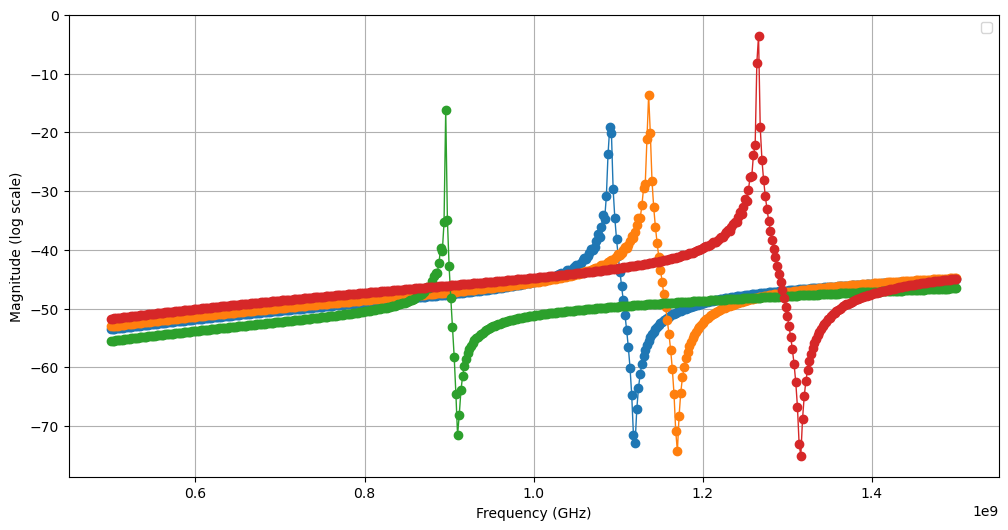

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12, 6])
plt.plot(freq,y11,'-o',lw=1)
plt.plot(freq,y11_1,'-o',lw=1)
plt.plot(freq,y11_2,'-o',lw=1)
plt.plot(freq,y11_3,'-o',lw=1)

plt.xlabel("Frequency (GHz)")
plt.ylabel("Magnitude (log scale)")
plt.grid("on")
plt.legend()

## input produce

In [76]:
# %load data_generatev2
# code by Zhengcaizhi
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special
import cmath
from scipy.signal import argrelextrema
import sawcom7 as sc

def cacul(paras):
    npiezo_1 = paras[0]
    eta = paras[1]
    e = paras[2]
    alpha = paras[3]
    c = paras[4]
    k2 = paras[5]
    vb = paras[6]
    epsilon_0 = 8.8541878128e-12 #The permittivity of vacuum
    pI = 3600E-9 #The period of IDT, normally is one wavelength
    h = 0.08*pI #The thickness of IDT, Al or Al-Cu1%
    W1 = 20*pI # Width of IDT (acoustic aperture), in m
    m_ratio = 0.6 #The metallization ratio

    eta_b = (eta+2*abs(e))/2
    epsilon = npiezo_1*epsilon_0
    x1 = np.cos(np.pi*m_ratio )
    m1 = math.sqrt((1-x1)/2) 
    km1 = special.ellipk(m1, out=None)
    p1 = 2*km1/np.pi
    x2 = -np.cos(np.pi*m_ratio )
    m2 = math.sqrt((1-x2)/2) 
    km2 = special.ellipk(m2, out=None)
    p2 = 2*km2/np.pi
    p_factor = p1/p2
    freq = np.linspace(0.5E9, 1.5E9, 501)
    # freq_mhz = freq/1e6
    delta_v = - (eta**2)/2
    k = abs(e)*(eta+abs(e)/2)
    kb = -(abs(e)**2)*eta/(eta+2*abs(e))
    delta_b = -((eta**2)-2*((abs(e)**2)))/4
    omega = freq*2*np.pi
    delta = omega/vb - 2*np.pi/pI - 1j*alpha

    v_delta = []
    for i in range(0,len(delta)):
        v_delta_0 = eta_b/((cmath.sqrt(delta_b-delta[i]))+ eta_b)# wave velocity in m/s
        v_delta.append(v_delta_0)
    v_delta = np.array(v_delta)
    omega = freq*2*np.pi
    C = (W1*epsilon*p_factor)/pI ##To check
    xi = []
    for i in range(0,len(omega)):
        xi_0 = c*cmath.sqrt((omega[i]*C*k2)/(pI*np.pi))
        xi_0 = -1j*xi_0
        xi.append(xi_0)
    xi = np.array(xi)

    lam1 = pI # Wavelength in m of SAW filters 
    c12 =  -1j*c*(k+kb*v_delta) # Reflectivity per unit length (~1.7% reflected per IDT spaced at lam/2)
    a1 = -xi # The transduction coefficient
    n1 = 100 # The number of IDT pairs
    L1 = n1*lam1 # Length of total IDT the grating, in m
    #W1 = 22*lam1 # Width of IDT (acoustic aperture), in m
    #d = sc.delta(freq,v1,lam1) - 500j
    Ct=n1*W1*epsilon # Static capacitance of total IDT
    #d1 = sc.delta(freq,v1,lam1)
    d1 = sc.thetau(c,delta,delta_v,kb,v_delta)
    C1 = sc.C0(freq,Ct)
    idt_ref_1 = sc.pmatrix(lam1,c12,a1,L1,d1,C1) #The P-Matrix of SAW resonator with refelection 
    # y11 = 20 * np.log10(abs(idt_ref_1.p33)/5)
    y11 = (idt_ref_1.p33)/5
    return y11
def YtoZS(Y_COM, freq):
    Y11 = 20*np.log10(abs(Y_COM))
    Z_COM = 1/Y_COM
    z = 50 
    S11_COM = (1-Y_COM*z)/(1+Y_COM*z)

    group_delay = -np.diff(np.unwrap(np.angle(S11_COM))) / np.diff(2 * np.pi * freq)
    group_delay = np.concatenate(([group_delay[0]], group_delay))
    Q_COM = 2*np.pi*(freq)*group_delay *abs(S11_COM)/(1-abs(S11_COM)**2)

    DSP_COM = 10*np.log10(1-abs(S11_COM)**2)
    return Y11, Z_COM.real, S11_COM.real, S11_COM.imag, Q_COM, DSP_COM
results = []
origin_paras = np.genfromtxt('D:\\data\\7p\\out/MP60.csv',delimiter=',')
for i in range(0,len(origin_paras)):
    # x = np.array([eta,e,alpha,c,k2,npiezo_1,vb,m_ratio])
    # x = np.append(origin_paras[i], 0.6)
    freq = np.linspace(0.5E9, 1.5E9, 501)
    x = origin_paras[i]
    y = cacul(x)
    [Y0_Y11, Y0_Z, Y0_SR, Y0_SI, Y0_Q, Y0_D] = YtoZS(y, freq)
    Inputs = np.stack((Y0_Y11, Y0_Z, Y0_SR, Y0_SI, Y0_Q, Y0_D),axis=-1)
    results.append(Inputs)

result = np.array(results)
mu = result.reshape(-1,6).mean(axis = 0)
sigma = result.reshape(-1,6).std(axis = 0)
if (sigma == 0).all() != True:
    result = (result - mu )/ sigma
else:
    result = result - mu

file_path = 'D:\\data\\7p\\input2w/2w.npy'
with open(file_path,'wb') as f:
    np.save(f, result)
file_path1 = file_path + 'musi.csv'
with open(file_path1,'w') as f:
    np.savetxt(f,mu)   
    np.savetxt(f,sigma)

In [99]:
np.argmax(result[:,:,0])

607520

In [95]:
result[0].shape

(501, 6)

In [100]:
result_o = result*sigma + mu

In [109]:
y0=np.exp((result_o[0,:,0]/20)*np.log(10))
y1=np.exp((result[0,:,0]/20)*np.log(10))

In [115]:
result[0,:,5]

array([-2.4940381 , -1.22807298, -0.7273927 , -0.5615703 , -0.61782843,
       -0.92798947, -1.950366  , -1.35165828, -0.75722462, -0.5523599 ,
       -0.57464965, -0.83729094, -1.63186739, -1.51385693, -0.79513863,
       -0.54851926, -0.53705737, -0.75673186, -1.40400544, -1.74011796,
       -0.84224273, -0.55015648, -0.5048445 , -0.68481992, -1.22580658,
       -2.09667539, -0.90009817, -0.5574383 , -0.47786759, -0.62048044,
       -1.07927356, -2.89400254, -0.97095881, -0.5706047 , -0.45603443,
       -0.56292745, -0.95490401, -2.82425274, -1.05819414, -0.58999031,
       -0.43929586, -0.51158093, -0.84708354, -2.02619827, -1.16709727,
       -0.61605534, -0.4276413 , -0.46601149, -0.7522355 , -1.64124737,
       -1.30659655, -0.64943058, -0.42109755, -0.42590208, -0.66795779,
       -1.38238275, -1.49344518, -0.69098394, -0.41973109, -0.39102071,
       -0.59257494, -1.18595592, -1.7650276 , -0.74192259, -0.42365398,
       -0.36120062, -0.52488633, -1.027166  , -2.23816954, -0.80

In [116]:
import obs.PackClass as pk
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=[16, 12])
plt.subplot(3,2,1)
plt.plot(freq,result[0][:,0])
plt.plot(freq,result_o[0][:,0])
# plt.grid('on')
plt.subplot(3,2,2)
plt.plot(freq,result[0][:,1])
plt.plot(freq,result_o[0][:,1])
plt.subplot(3,2,3)
plt.plot(freq,result[0][:,2])
plt.plot(freq,result_o[0][:,2])
plt.subplot(3,2,4)
plt.plot(freq,result[0][:,3])
plt.plot(freq,result_o[0][:,3])
plt.subplot(3,2,5)
plt.plot(freq,result[0][:,4])   
plt.plot(freq,result_o[0][:,4])
plt.subplot(3,2,6)
plt.plot(freq,result[0][:,5])
plt.plot(freq,result_o[0][:,5])

In [ ]:
plot = pk.Plot_all(y1,y1,freq,name1='0',name2='1')
plot.plot_all()

## net 

In [1]:
# %load net_2paras
# code by Zhengcaizhi
import os
import shutil
import numpy as np
import keras.optimizers as optimizer
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models, layers, Input, Model
import skrf as rf
from data_gene_2paras import cacul
import keras.backend as K 
from keras.callbacks import LearningRateScheduler
from keras.layers import Lambda, Concatenate, Dense, Conv1D, Flatten, Dropout

# model2v3-v5
def IANN():
    input = Input(shape=(501,6))
    branch1 = Lambda(lambda x:x[:,:,0])(input)  
    branch2 = Lambda(lambda x:x[:,:,1])(input)
    branch3 = Lambda(lambda x:x[:,:,2])(input)
    branch4 = Lambda(lambda x:x[:,:,3])(input)
    branch5 = Lambda(lambda x:x[:,:,4])(input)
    branch6 = Lambda(lambda x:x[:,:,5])(input)
    h1 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(branch1)
    h2 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(branch2)
    h3 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(branch3)
    h4 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(branch4)
    h5 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(branch5)
    h6 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(branch6)
    h1 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h1)
    h2 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h2)
    h3 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h3)
    h4 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h4)
    h5 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h5)
    h6 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h6)
    h1 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h1)
    h2 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h2)
    h3 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h3)
    h4 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h4)
    h5 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h5)
    h6 = Dense(1003,activation='relu', kernel_initializer='he_uniform')(h6)
    # h1 = Dense(3207,activation='relu', kernel_initializer='he_uniform')(h1)
    # h2 = Dense(3207,activation='relu', kernel_initializer='he_uniform')(h2)
    # h3 = Dense(3207,activation='relu', kernel_initializer='he_uniform')(h3)
    # h4 = Dense(3207,activation='relu', kernel_initializer='he_uniform')(h4)
    # h5 = Dense(3207,activation='relu', kernel_initializer='he_uniform')(h5)
    # hn drop?
    o1 = Dense(16,activation='relu', kernel_initializer='he_uniform')(h1)
    o2 = Dense(16,activation='relu', kernel_initializer='he_uniform')(h2)
    o3 = Dense(16,activation='relu', kernel_initializer='he_uniform')(h3)
    o4 = Dense(16,activation='relu', kernel_initializer='he_uniform')(h4)
    o5 = Dense(16,activation='relu', kernel_initializer='he_uniform')(h5)
    o6 = Dense(16,activation='relu', kernel_initializer='he_uniform')(h6)
    out1 = Concatenate(axis = -1)((o1,o2,o3,o4,o5,o6))
    out1 = Dense(100, activation='relu', kernel_initializer='he_uniform')(out1) #model2v6
    out1 = Dense(100, activation='relu', kernel_initializer='he_uniform')(out1) #model2v6
    out1 = Dense(100, activation='relu', kernel_initializer='he_uniform')(out1) #model2v6
    h2 = Dense(29, activation='relu', kernel_initializer='he_uniform')(out1)
    out2 = Dense(7,activation='sigmoid', kernel_initializer='he_uniform')(h2)
    model = Model(inputs=input, outputs=out2)
    model.summary() 
    return model

def conv(): #model3v1
    input = Input(shape=(801,5))
    branchs = Lambda(lambda x: tf.split(x, num_or_size_splits=5, axis=-1))(input)
    o1 = Conv1D(4,256,activation='relu', kernel_initializer='he_uniform')(branchs[0])
    o2 = Conv1D(4,256,activation='relu', kernel_initializer='he_uniform')(branchs[1])
    o3 = Conv1D(4,256,activation='relu', kernel_initializer='he_uniform')(branchs[2])
    o4 = Conv1D(4,256,activation='relu', kernel_initializer='he_uniform')(branchs[3])
    o5 = Conv1D(4,256,activation='relu', kernel_initializer='he_uniform')(branchs[4])
    o1 = Conv1D(16,256,activation='relu', kernel_initializer='he_uniform')(o1)
    o2 = Conv1D(16,256,activation='relu', kernel_initializer='he_uniform')(o2)
    o3 = Conv1D(16,256,activation='relu', kernel_initializer='he_uniform')(o3)
    o4 = Conv1D(16,256,activation='relu', kernel_initializer='he_uniform')(o4)
    o5 = Conv1D(16,256,activation='relu', kernel_initializer='he_uniform')(o5)
    out1 = Concatenate(axis = -1)((o1,o2,o3,o4,o5))
    c1 = Conv1D(64,256,activation='relu', kernel_initializer='he_uniform')(out1)
    out1 = Flatten()(c1)
    out2 = Dense(2,activation='sigmoid', kernel_initializer='he_uniform')(h2)
    model = Model(inputs=input, outputs=out2)
    model.summary() 
    return model
# names = [[150,45,80],[150,50,80],[150,55,80]
#          ,[60,45,80],[60,50,80],[60,55,80]
#          ,[90,45,80],[90,50,80],[90,55,80]]

# MP_num = [45,60,65,55,50]
# MP_num = [45]
# Pitch_num = [180,200,225,260]
# PF = [[180,8.5],[200,7.5],[225,6.5],[260,5.5]]
# PF = [[200,7.5]]

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
0.001,
decay_steps=1000,
#   10的decay训练有些过于慢了
decay_rate=1,
staircase=False)



model = IANN()
freq = np.linspace(5*1e8,1.5*1e9,501)
data_path = 'D:\\data\\7p/input2w/2w.npy'
data = np.load(data_path)
label_path = 'D:\\data\\7p/out/MP60.csv'
label = np.genfromtxt(label_path,delimiter=',')
label_mm_path = label_path + 'maxmin.csv'
label_mm = np.genfromtxt(label_mm_path, delimiter=',')
label_max = label_mm[0]
label_min = label_mm[1]
label = (label-label_min) / (label_max - label_min)
data_set = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(data), tf.data.Dataset.from_tensor_slices(label)))
BATCHSIZE=128
dataset = data_set
valiset = dataset.take(128).batch(BATCHSIZE).cache().prefetch(tf.data.AUTOTUNE) 
trainset = dataset.skip(128)
trainset = trainset.cache().shuffle(trainset.cardinality(),seed=1919810,reshuffle_each_iteration=True).repeat().batch(BATCHSIZE).prefetch(tf.data.AUTOTUNE)

checkpoint_filepath = os.path.join(os.getcwd(),'obs','weights')
# shutil.rmtree(checkpoint_filepath)
# checkpoint_filepath = checkpoint_filepath + '\\' +str(Pitch)
# log_dir="c:\\Users\\caizhi.zheng\\code\\For AI\\logs2v5\\"+str(MP)+'-'+str(Pitch)
log_dir="c:\\Users\\caizhi.zheng\\code\\For AI\\logs"
# shutil.rmtree(log_dir,ignore_errors=True)  

model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', verbose=1, save_weights_only=True, 
                                    save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=200)
Board = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
opt = optimizer.Adam(learning_rate=lr_schedule)
model.compile(optimizer=opt, loss='mse', metrics='accuracy')
# reduce_lr = LearningRateScheduler(scheduler)
# model.fit(dataset, epochs=25)
history = model.fit(trainset, validation_data=valiset, steps_per_epoch=80, epochs=500, callbacks=[model_checkpoint,early_stop,Board])#validation_split=0.02,)
model.evaluate(valiset)
# test
# if Pitch != 225:
#     pitch = int(0.1*Pitch)
# test_path = 'C:\\Users\\caizhi.zheng\\code\\For AI\\SNP Selection/'+'LT'+str(NT)+ 'MP'+str(MP) +'P'+str(pitch) +'/'
# saw_set = rf.read_all_networks(test_path)
# for name in saw_set:
#     saw = saw_set[name]
# y0 = saw['900-1100MHZ'].y[:,0,0]
# test_set = np.ones((801,5))*0.01
# # test_set = np.zeros((801,5))
# # data_mm_path = data_path + 'musi.csv'
# # data_mm = np.genfromtxt(data_mm_path, delimiter=',')
# # data_mu = data_mm[:5]
# # data_sigma = data_mm[5:10]
# # test_set = (test_set * data_sigma) + data_mu

# test_set = tf.data.Dataset.from_tensors(test_set).batch(1) 
# # model = models.load_model(checkpoint_filepath)
# # model.evaluate(dataset.batch(BATCHSIZE))
# model.load_weights(checkpoint_filepath)
# test_result = model.predict(test_set)
# print(test_result) 
# # print(test_result.shape) 
# # 反归一化
# test_result = (test_result[0]*(label_max - label_min)) + label_min
# print(test_result) 
# result_path = 'c:\\Users\\caizhi.zheng\\code\\For AI\\loss_picture/result' + suffix + '.csv'
# with open(result_path, 'w') as f:
#     np.savetxt(f, test_result, delimiter=',')
    


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 501, 6)]     0           []                               
                                                                                                  
 lambda (Lambda)                (None, 501)          0           ['input_1[0][0]']                
                                                                                                  
 lambda_1 (Lambda)              (None, 501)          0           ['input_1[0][0]']                
                                                                                                  
 lambda_2 (Lambda)              (None, 501)          0           ['input_1[0][0]']                
                                                                                              

[0.03747507557272911, 0.5703125]

In [128]:
tt = np.loadtxt('./h-0.01-0.01-1.txt',skiprows=8)

In [133]:
ttt = tt[:,1:3]

In [143]:
test = np.vectorize(complex)(ttt[:,0],ttt[:,1])

In [144]:
test = np.array(YtoZS(test,freq))

In [145]:
test.shape

(6, 501)

In [146]:
test_su = (test.T - mu)/sigma

In [149]:
test_set = tf.data.Dataset.from_tensors(test_su).batch(1) 
# model = models.load_model(checkpoint_filepath)
# model.evaluate(dataset.batch(BATCHSIZE))
model.load_weights(checkpoint_filepath)
test_result = model.predict(test_set)

1/1 [==============================] - 0s 239ms/step


In [150]:
test_result

array([[5.8061975e-16, 4.2130578e-02, 2.1157525e-02, 9.9575937e-01,
        9.9561900e-01, 1.5915664e-02, 9.1835809e-01]], dtype=float32)

In [151]:
test_result = (test_result[0]*(label_max - label_min)) + label_min
print(test_result) 

[4.02850237e+01 2.56665254e+02 1.47058702e+02 5.99151874e-02
 2.13752354e+00 7.23715451e-03 4.93382288e+03]
